# Assignment8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [124]:
df = pd.read_csv("car_data.csv")

In [125]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [126]:
y=df.loc[:,["Price"]]
X=df.loc[:,["Mileage"]]


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=600)

In [128]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Price')

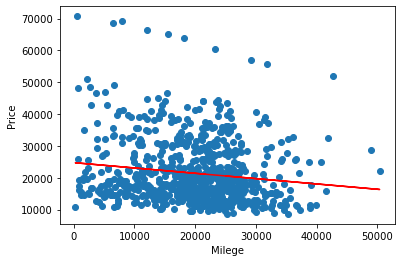

In [129]:
plt.scatter(df["Mileage"],df["Price"])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel("Milege")
plt.ylabel("Price")

In [130]:
lr.score(X_test, y_test,)

0.02550987208604172

In [131]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)

In [132]:
print(r2_score(y_test,y_pred))

0.02550987208604172


In [133]:
y=df.loc[:,["Price"]]
X=df.loc[:,["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=600)

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [136]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [137]:
from sklearn.metrics import r2_score
y_pred=lr.predict(X_test)

In [138]:
print(r2_score(y_test,y_pred))

0.34923189632197293


In [139]:
df=df[['Price', 'Mileage', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
df

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,6,3.1,4,1,1,1
1,17542.036083,9135,6,3.1,4,1,1,0
2,16218.847862,13196,6,3.1,4,1,1,0
3,16336.913140,16342,6,3.1,4,1,0,0
4,16339.170324,19832,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...
799,16507.070267,16229,6,3.0,4,1,0,0
800,16175.957604,19095,6,3.0,4,1,1,0
801,15731.132897,20484,6,3.0,4,1,1,0
802,15118.893228,25979,6,3.0,4,1,1,0


In [140]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [142]:
df = pd.read_csv("car_data.csv")

In [143]:
pd.get_dummies(df, columns=['Make',"Model","Trim"], drop_first=True)

,Price,Mileage,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,17314.103129,8221,Sedan,6,3.1,4,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,17542.036083,9135,Sedan,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16218.847862,13196,Sedan,6,3.1,4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16336.913140,16342,Sedan,6,3.1,4,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16339.170324,19832,Sedan,6,3.1,4,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Sedan,6,3.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,16175.957604,19095,Sedan,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
801,15731.132897,20484,Sedan,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
802,15118.893228,25979,Sedan,6,3.0,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
